In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Define the column names
column_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

# Load the dataset
df = pd.read_csv("Glass_Identification.csv", names=column_names)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


This dataset contains the details of Chemical compostion and types of glass, here types of glass is a target variable and others are independent variables. Its a classification problem and we need to predict the type of glass.

In [54]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [55]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [57]:
df.shape

(214, 11)

This dataset contains 214 rows and 11 columns, Out of which 1 is taget variable and other 10 are independent variables.

In [58]:
df.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [59]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [60]:
# Encode the 'Type of glass' column to create a new column 'GlassType'
df['GlassType'] = df['Type'].apply(lambda x: 'Window' if x in [1, 2, 3, 4] else 'Non-window')

# Convert the new 'GlassType' column to a categorical type
df['GlassType'] = df['GlassType'].astype('category')

# Verify the encoding
print(df['GlassType'].value_counts())


GlassType
Window        163
Non-window     51
Name: count, dtype: int64


In [61]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,Window
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,Window
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,Window
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,Window
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,Window


In [62]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


Here it shows that there is no column have same values.

In [63]:
print('Total Duplicated Rows are ',df.duplicated().sum())

Total Duplicated Rows are  0


In [64]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


There are 214 observations in the dataset. 
The mean refractive index (RI) is approximately 1.518, with a standard deviation of about 0.003. This indicates that the RI values are relatively close to each other on average.
Similar descriptive statistics can be observed for silicon oxide (Si), potassium oxide (K), calcium oxide (Ca), barium oxide (Ba), and iron oxide (Fe).
The glass types range from 1 to 7, with a mean type value of approximately 2.78 and a standard deviation of about 2.10. The types represent different categories or classes of glass.
By examining the minimum and maximum values as well as the quartiles, we can identify potential outliers in the dataset.

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


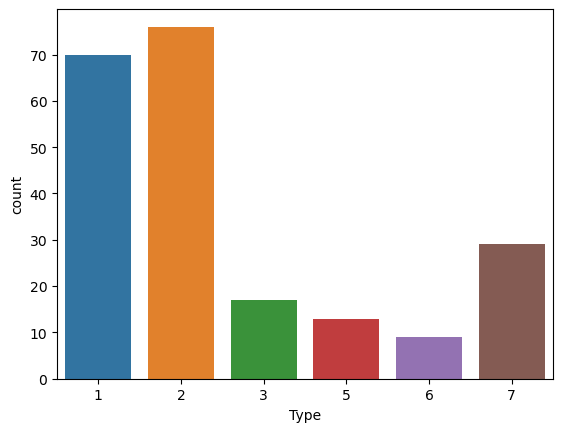

In [65]:
ax = sns.countplot(x='Type', data=df)
print(df['Type'].value_counts())

GlassType
Window        163
Non-window     51
Name: count, dtype: int64


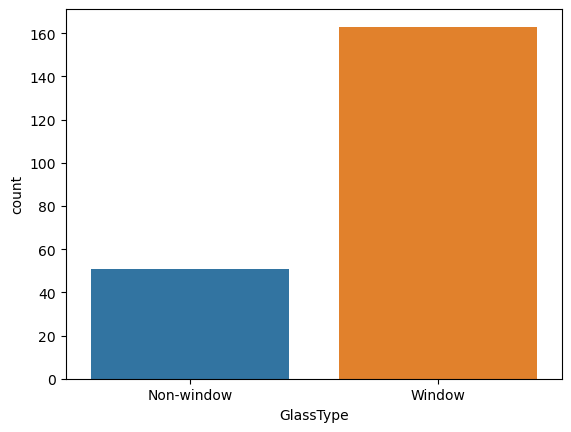

In [66]:
ax = sns.countplot(x='GlassType', data=df)
print(df['GlassType'].value_counts())

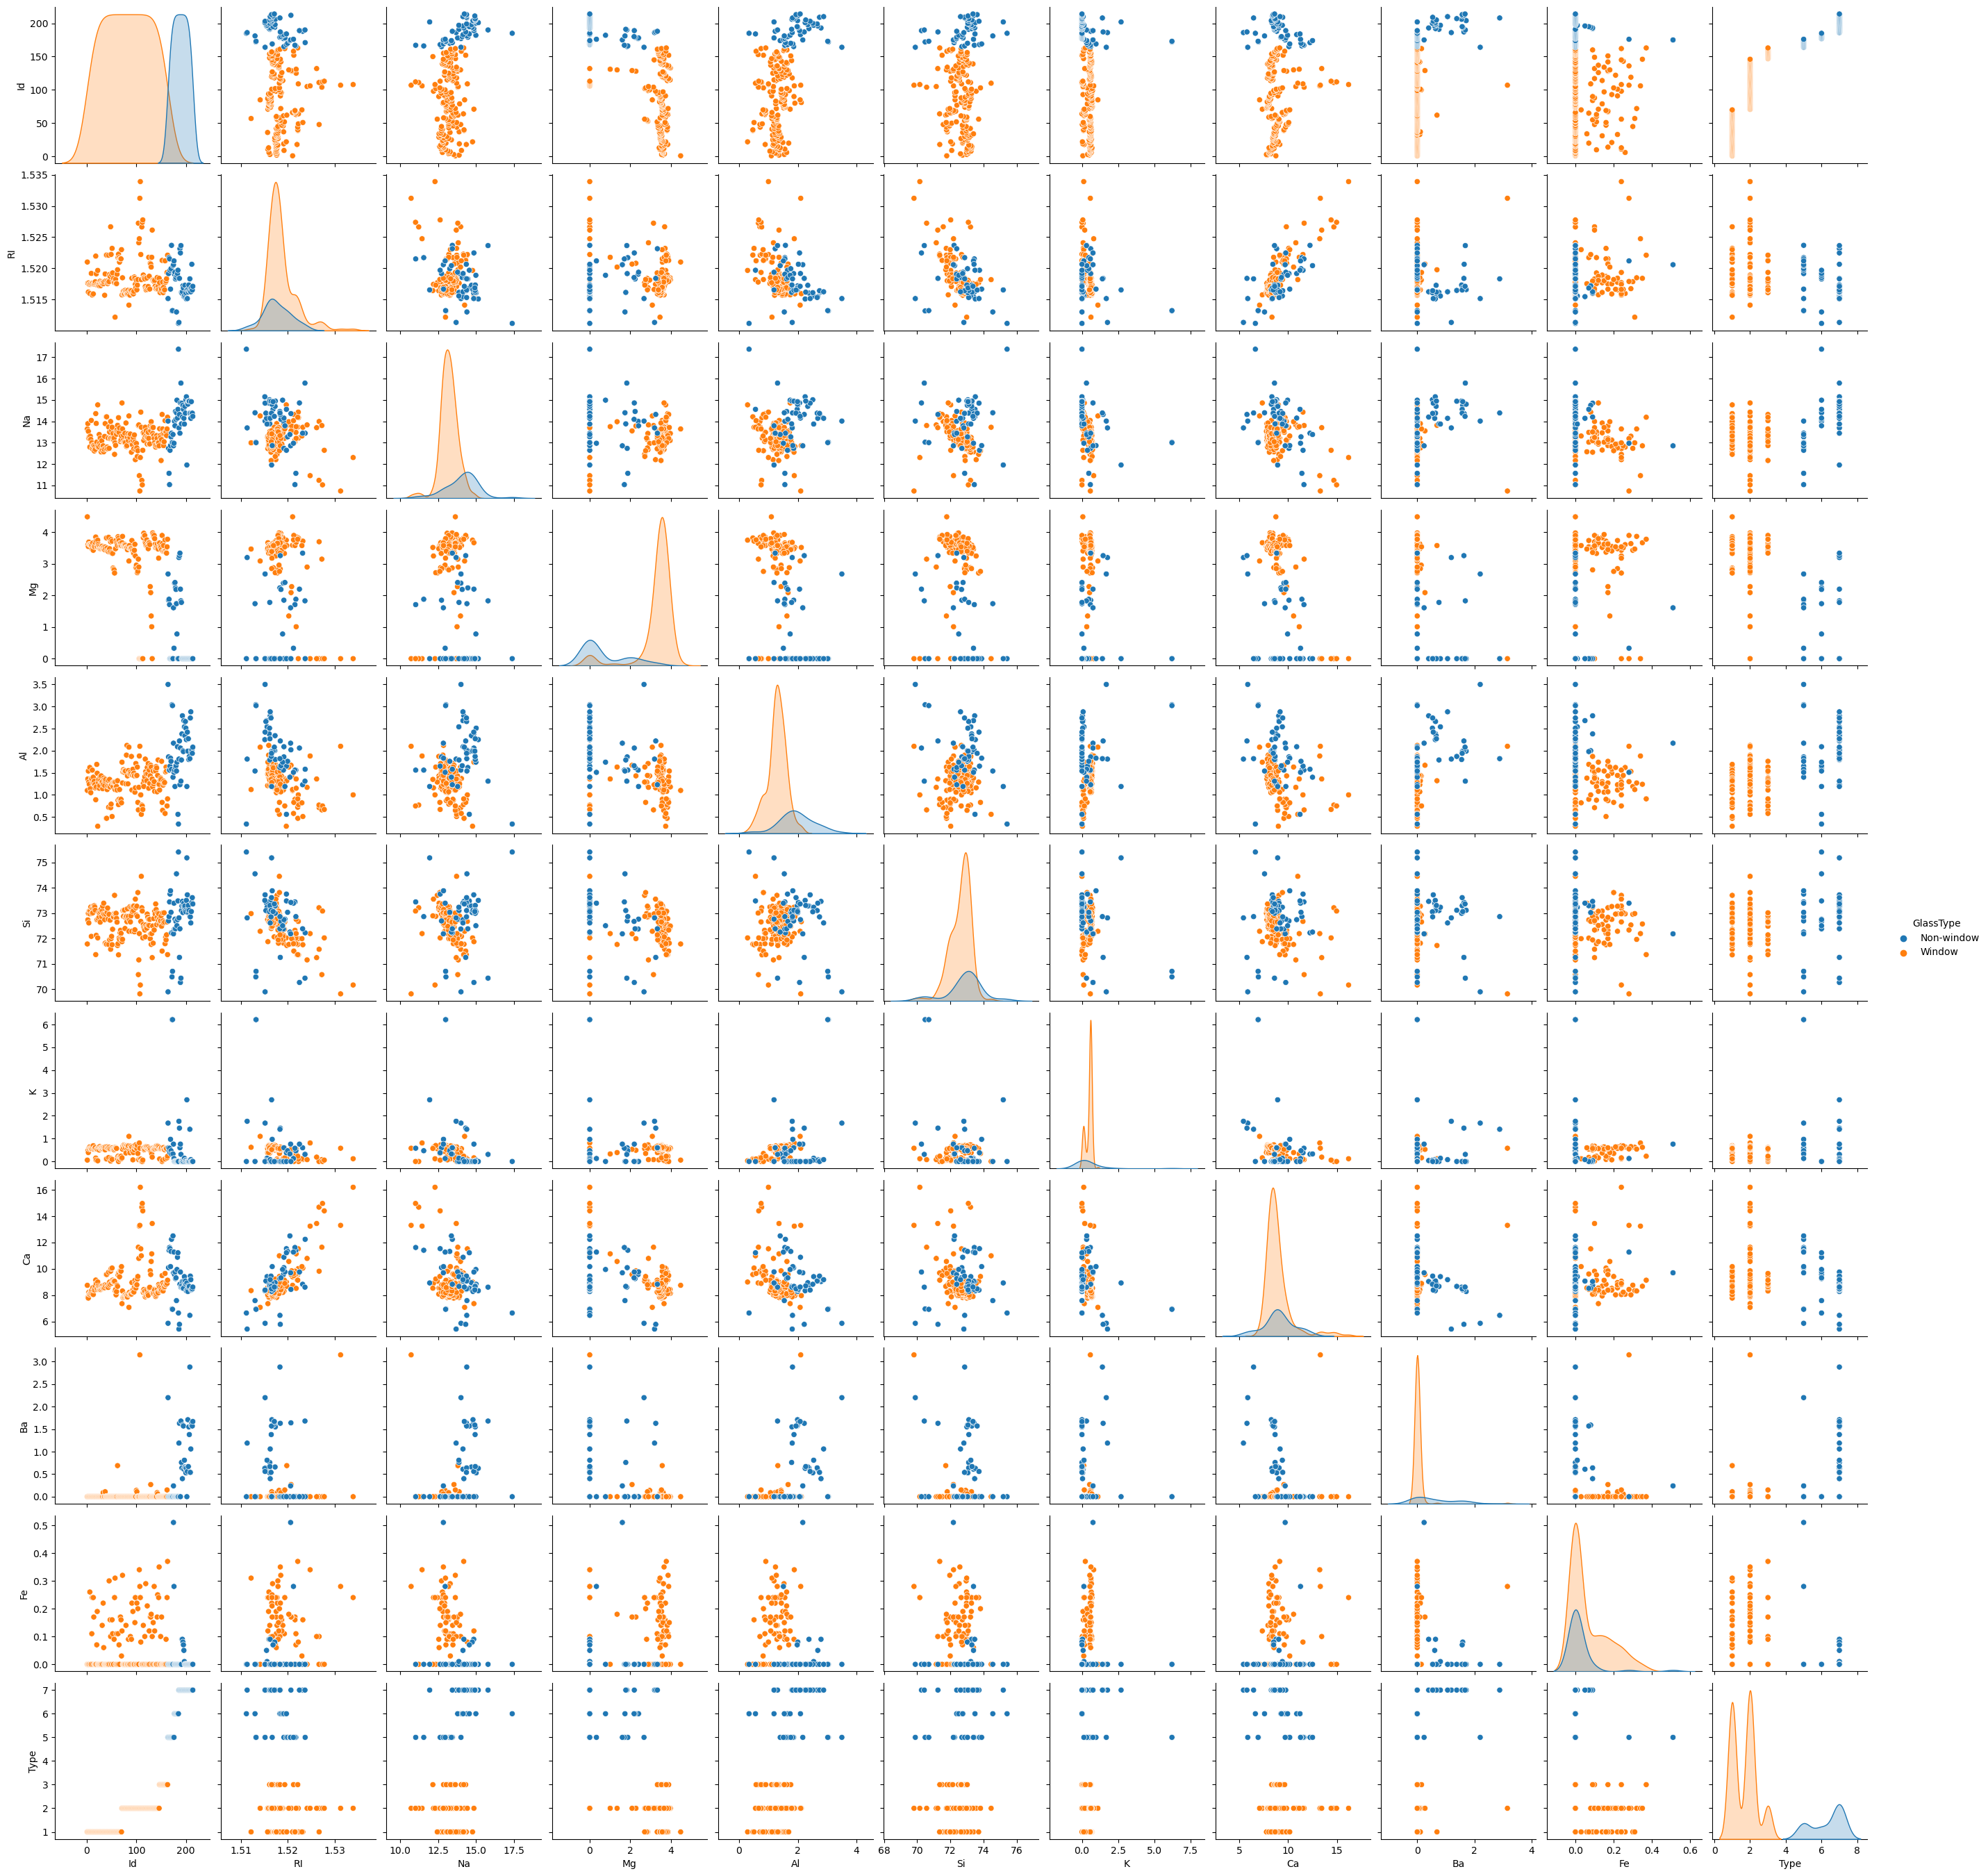

In [67]:
# Pairplot to visualize feature relationships and target variable
sns.pairplot(df, hue='GlassType', diag_kind='kde')
plt.show()


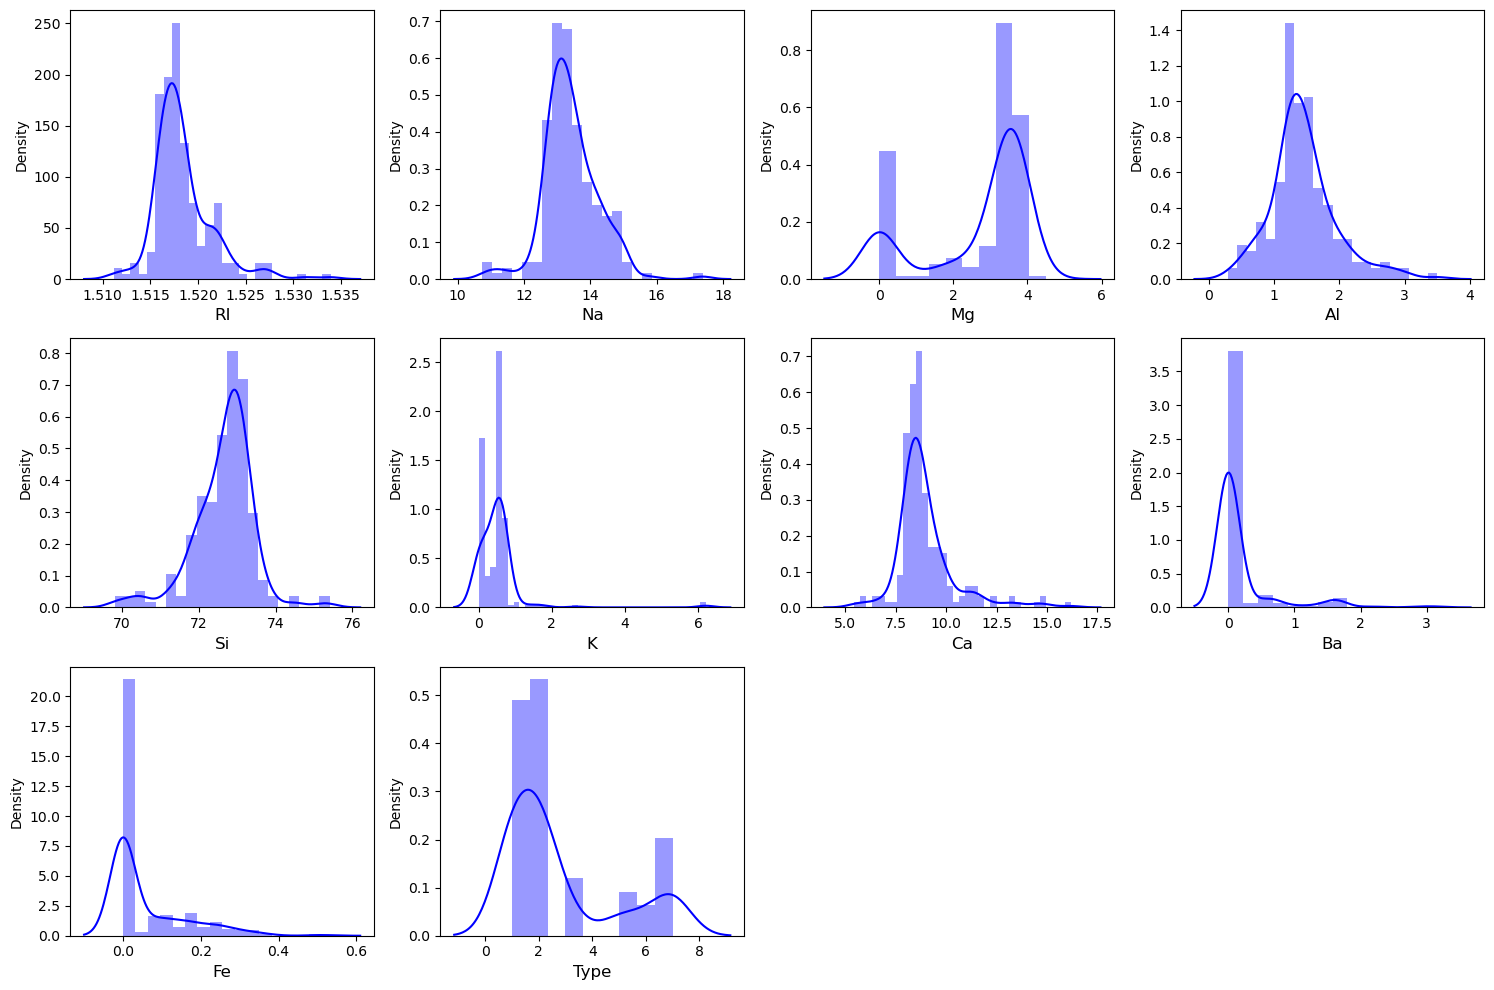

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting specific columns for plotting
columns_to_plot = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

plt.figure(figsize=(15, 10), facecolor='white')  # Increased figsize to accommodate 3x4 grid
plotnumber = 1
for col in columns_to_plot:
    ax = plt.subplot(3, 4, plotnumber)  # Changed to 3x4 grid
    sns.distplot(df[col], color='b')
    plt.xlabel(col, fontsize=12)
    plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()


the minimum and maximum values as well as the quartiles, we can identify potential outliers in the dataset.

In [69]:
#Seperating the Numerical and categorical columns

# Checking for categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'category']
print("Categorical columns:", cat_col)
print('\n')

# Checking for numerical columns
num_col = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print("Numerical columns:", num_col)
print('\n')



Categorical columns: ['GlassType']


Numerical columns: ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']




In [70]:
df[num_col].skew()

Id      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

Now we will balance the skewness as the acceptable range is -0.5 to

In [71]:
df['RI']= np.cbrt(df['RI'])

In [72]:

df['Mg']= np.cbrt(df['Mg'])

In [73]:
df['Al']= np.cbrt(df['Al'])

In [74]:
df['K']= np.cbrt(df['K'])

In [75]:
df['Ca']= np.cbrt(df['Ca'])

In [76]:
df['Ba']= np.cbrt(df['Ba'])

In [77]:
df['Fe']= np.cbrt(df['Fe'])

In [78]:
df[num_col].skew()

Id      0.000000
RI      1.617049
Na      0.454181
Mg     -1.440196
Al     -0.204132
Si     -0.730447
K      -0.591896
Ca      1.407358
Ba      2.073007
Fe      0.894683
Type    1.114915
dtype: float64

So here we have corrected the skewness of five columns.

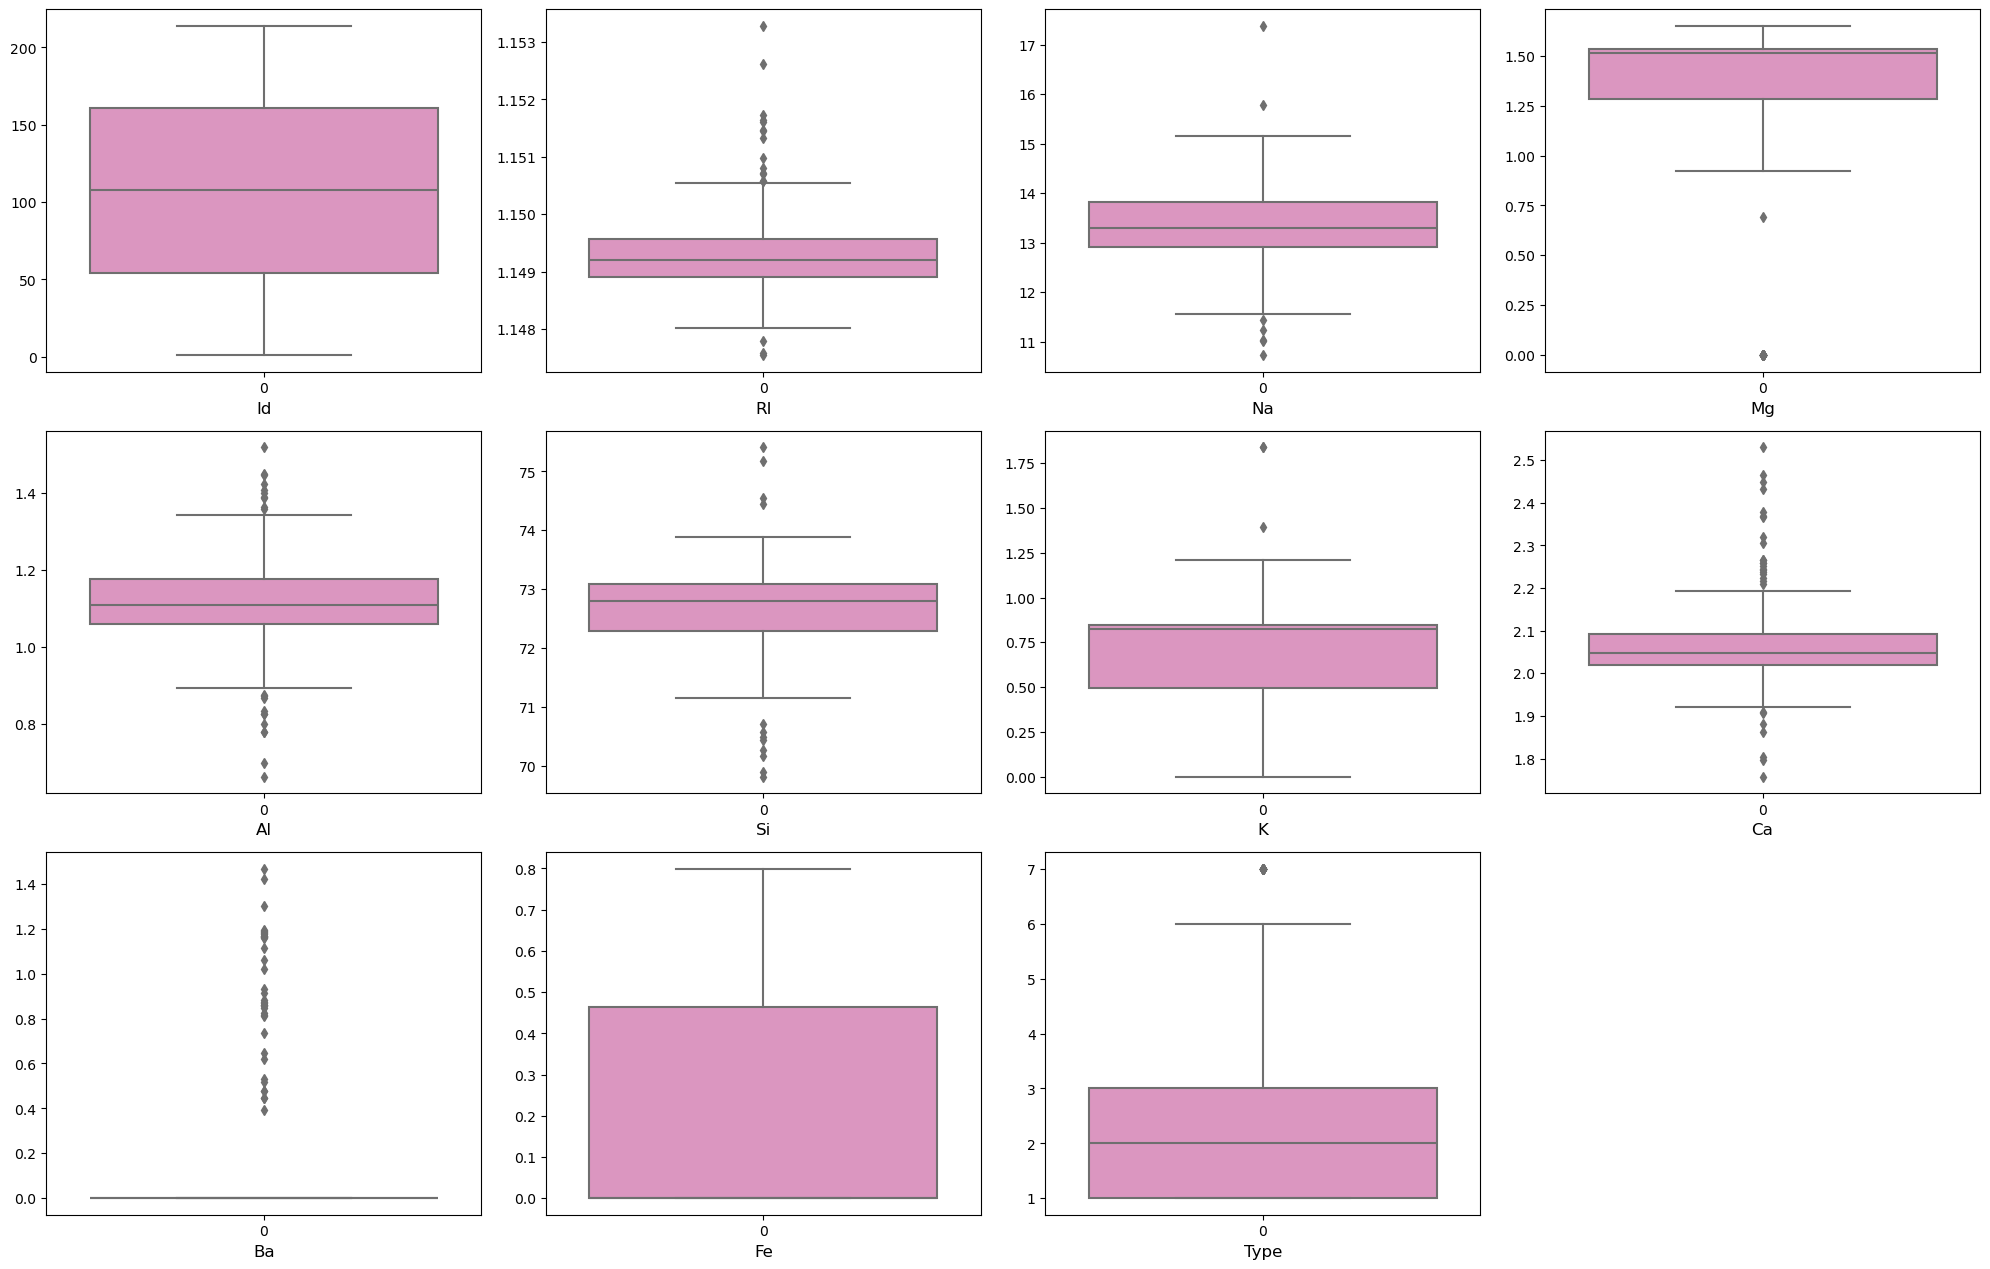

In [80]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in num_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.boxplot(df[column], palette = 'Set2_r')
        plt.xlabel(column, fontsize = 12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber +=1
plt.tight_layout()

So we have found outlier in some of the columns. So we will remove the outliers using the zscore and IQR techniques before building the model and selecting the best one.

In [81]:
from scipy.stats import zscore
out_features = df[num_col]
z = np.abs(zscore(out_features))
z

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.723976,0.873958,0.284953,0.759032,0.634449,1.127082,0.835901,0.107657,0.439469,0.679381,0.848275
1,1.707788,0.248977,0.591817,0.563835,0.057329,0.102319,0.346205,0.841573,0.439469,0.679381,0.848275
2,1.691601,0.721771,0.149933,0.551954,0.300216,0.438787,0.188105,0.883072,0.439469,0.679381,0.848275
3,1.675413,0.232451,0.242853,0.584946,0.204901,0.052974,0.485589,0.523791,0.439469,0.679381,0.848275
4,1.659226,0.311778,0.169205,0.568556,0.313611,0.555256,0.455958,0.644800,0.439469,0.679381,0.848275
...,...,...,...,...,...,...,...,...,...,...,...
209,1.659226,0.705234,0.898681,1.990475,2.344370,0.052974,0.716931,0.217776,2.317817,0.679381,2.010478
210,1.675413,0.500215,1.856097,1.990475,1.086101,0.529374,2.018006,0.380508,2.716835,0.679381,2.010478
211,1.691601,0.755138,1.168721,1.990475,1.134079,0.995252,2.018006,0.348946,2.749579,0.679381,2.010478
212,1.707788,0.612638,1.193270,1.990475,1.005054,1.241133,2.018006,0.317483,2.703545,0.679381,2.010478


In [82]:
#putting thrushold = 3 then 99.7% of the data comes under the bell-shaped curve
np.where(z>3)

(array([ 21, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112, 163,
        163, 163, 171, 172, 184, 184, 184, 185, 188, 201, 207], dtype=int64),
 array([4, 1, 2, 5, 8, 1, 5, 7, 7, 7, 1, 7, 4, 5, 8, 6, 6, 2, 4, 5, 7, 5,
        5, 8], dtype=int64))

In [83]:
#Now we will remove the data above zscore and creating new DF.
df1= df[(z<3).all(axis=1)]
print("New Data Frame:",df1.shape)
print("Old Data Frame:",df.shape)

New Data Frame: (200, 12)
Old Data Frame: (214, 12)


In [84]:
print("Data loss Perc%", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss Perc% 6.5420560747663545


In [85]:
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,GlassType
0,1,1.150034,13.64,1.649740,1.032280,71.78,0.391487,2.060643,0.000000,0.0,1,Window
1,2,1.149176,13.89,1.532619,1.107932,72.73,0.782974,1.985732,0.000000,0.0,1,Window
2,3,1.148815,13.53,1.525490,1.154800,72.99,0.730614,1.981496,0.000000,0.0,1,Window
3,4,1.149189,13.21,1.545286,1.088587,72.61,0.829134,2.018168,0.000000,0.0,1,Window
4,5,1.149129,13.27,1.535452,1.074337,73.08,0.819321,2.005816,0.000000,0.0,1,Window
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.148828,14.14,0.000000,1.422757,72.61,0.430887,2.093860,1.019613,0.0,7,Non-window
210,211,1.148985,14.92,0.000000,1.257818,73.06,0.000000,2.032793,1.167165,0.0,7,Non-window
211,212,1.149943,14.36,0.000000,1.264107,73.42,0.000000,2.036014,1.179274,0.0,7,Non-window
212,213,1.148899,14.38,0.000000,1.247194,73.61,0.000000,2.039226,1.162251,0.0,7,Non-window


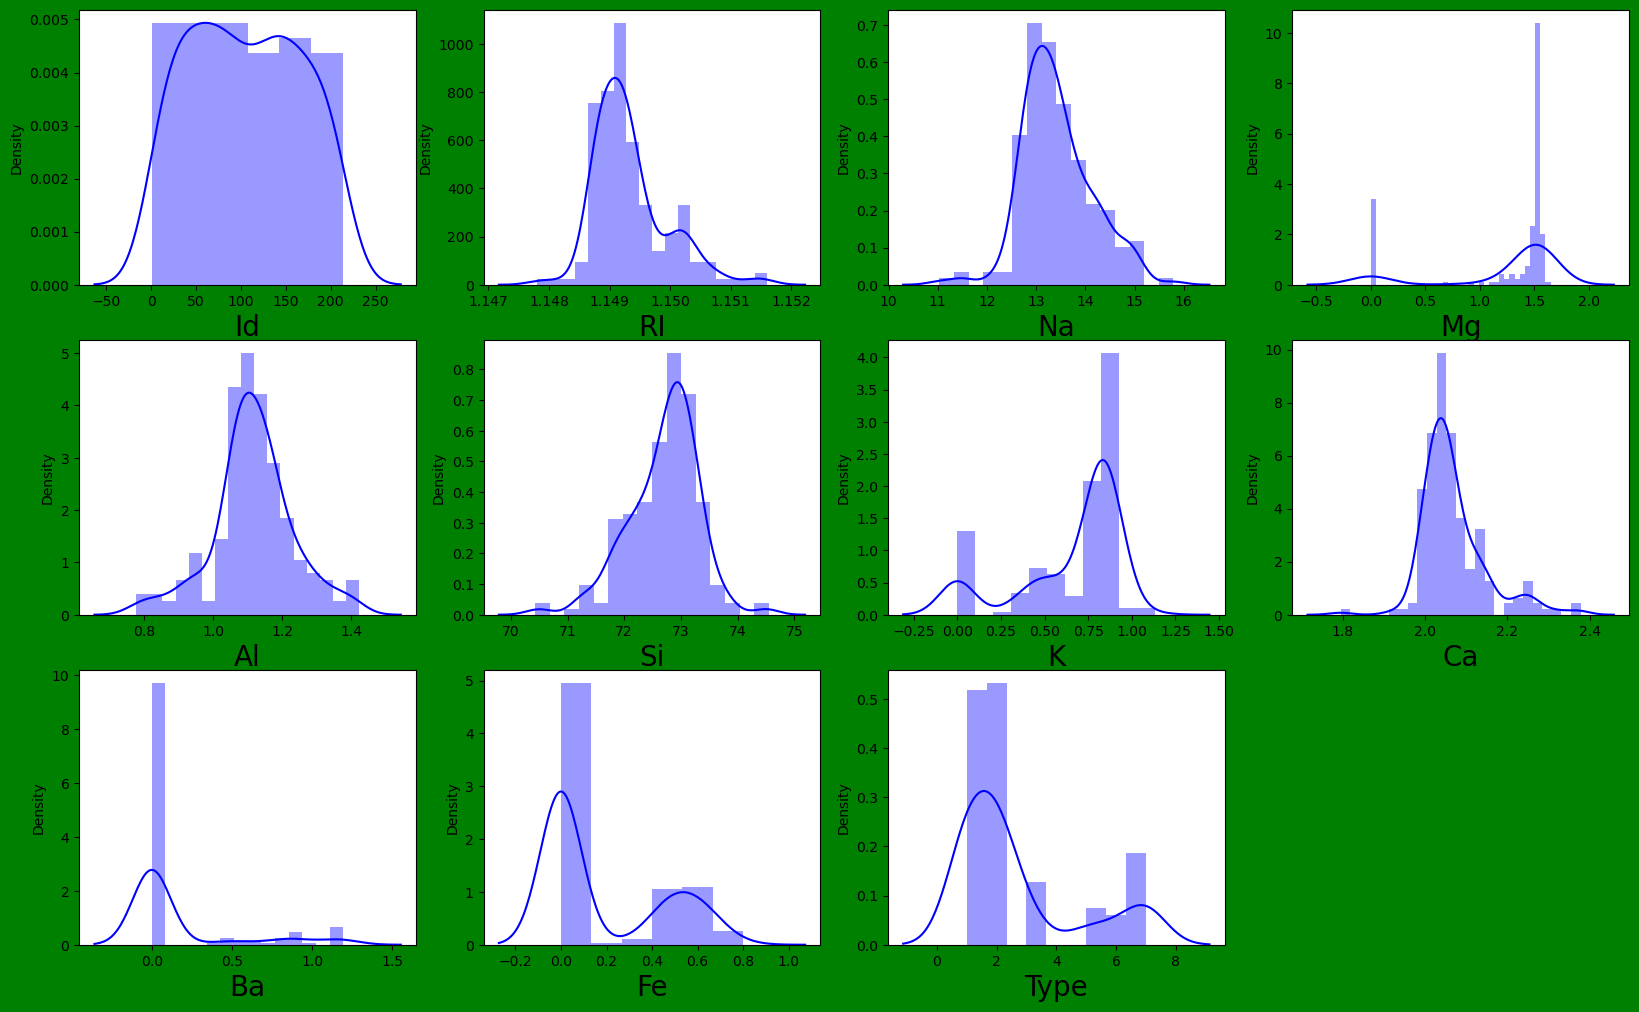

In [86]:
plt.figure(figsize=(20,25), facecolor="green")
plotnumber = 1
for column in num_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column], color ='b')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data almost looks normal in all the columns.

In [87]:
#Finding the correaltion between the variables.
corr= df1[num_col].corr()
corr

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.040289,0.438710,-0.627811,0.473181,0.096061,-0.501102,0.203503,0.554076,-0.071404,0.872096
RI,-0.040289,1.000000,0.047012,0.006319,-0.505099,-0.654737,-0.123602,0.697602,-0.152033,0.079808,-0.110871
Na,0.438710,0.047012,1.000000,-0.481843,0.173412,-0.245896,-0.722512,-0.035470,0.580433,-0.189932,0.562354
Mg,-0.627811,0.006319,-0.481843,1.000000,-0.515788,-0.304454,0.611229,-0.426937,-0.647954,0.091720,-0.766939
Al,0.473181,-0.505099,0.173412,-0.515788,1.000000,0.329678,-0.115594,-0.218863,0.533414,-0.074540,0.594896
Si,0.096061,-0.654737,-0.245896,-0.304454,0.329678,1.000000,-0.064122,-0.209159,0.131556,-0.050980,0.209551
K,-0.501102,-0.123602,-0.722512,0.611229,-0.115594,-0.064122,1.000000,-0.275312,-0.538288,0.166634,-0.648037
Ca,0.203503,0.697602,-0.035470,-0.426937,-0.218863,-0.209159,-0.275312,1.000000,-0.105503,0.075290,0.152963
Ba,0.554076,-0.152033,0.580433,-0.647954,0.533414,0.131556,-0.538288,-0.105503,1.000000,-0.052575,0.719130
Fe,-0.071404,0.079808,-0.189932,0.091720,-0.074540,-0.050980,0.166634,0.075290,-0.052575,1.000000,-0.178242


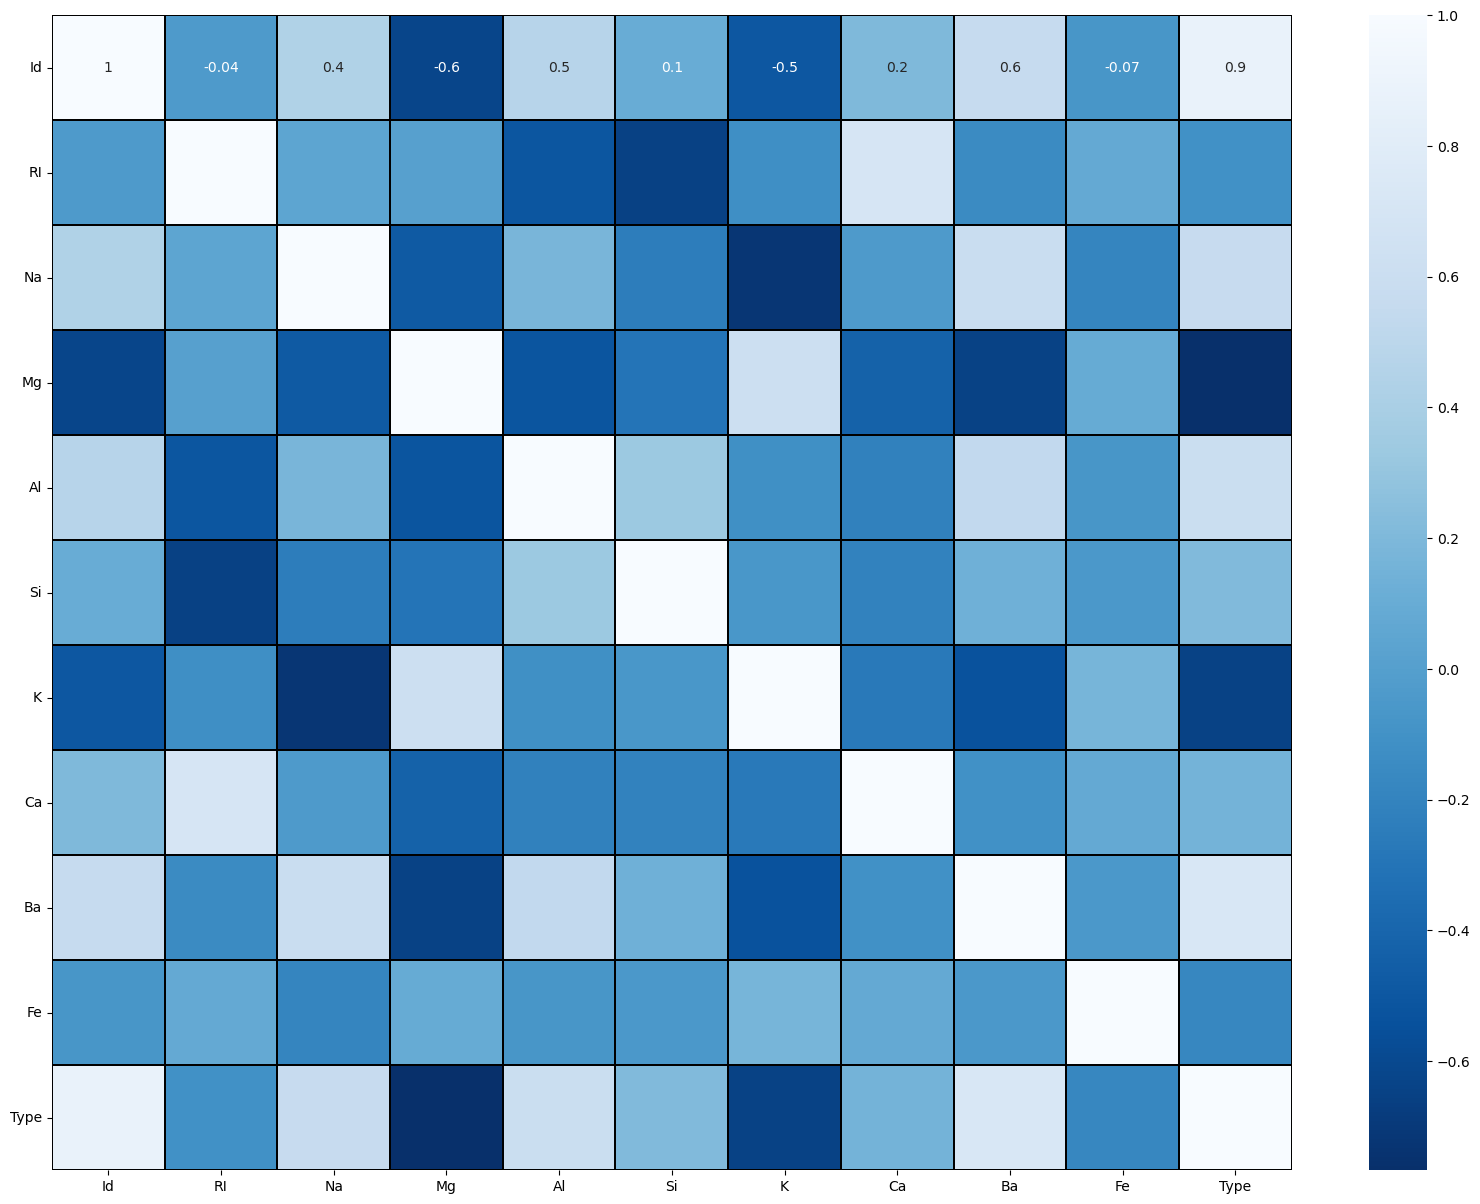

In [88]:
plt.figure(figsize = (20,15))
sns.heatmap(corr,linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

Note- 0= no relation, -0.3 to +0.3- less corr, greater than +0.5 moderate corr, greater than +0.7 high corr

In [89]:
from sklearn.preprocessing import StandardScaler

# Assuming num_col is a list of numerical column names and df1 is your DataFrame
num_col.remove('Id')  # Remove 'PassengerId' from the list of numerical columns

x = df1[num_col]  # Select only the remaining numerical columns for scaling
y = df1['Type']

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

In [91]:
# finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']= x.columns

vif

,VIF values,Features
0,124035.834242,RI
1,2589.829435,Na
2,70.825808,Mg
3,297.121198,Al
4,53737.865063,Si
5,25.749170,K
6,5566.367711,Ca
7,4.548546,Ba
8,1.636937,Fe
9,11.602522,Type


Here the vif value shows that how much times it is corr to other vairables.

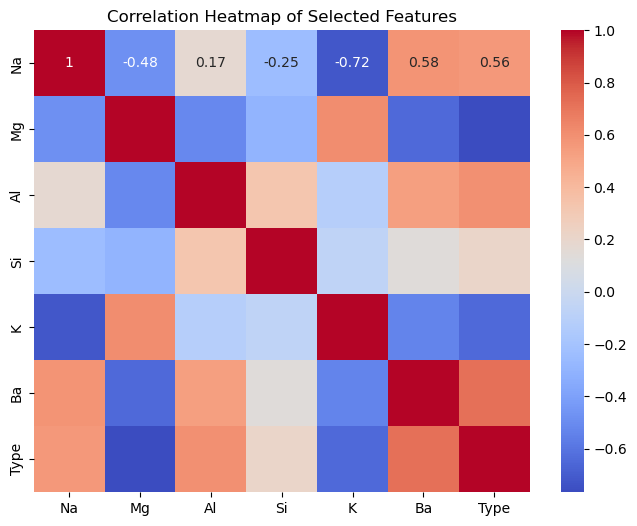

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x contains your feature matrix and y contains the target variable
# Replace x and y with your actual feature matrix and target variable

# Initialize a logistic regression model
model = LogisticRegression()

# Perform Recursive Feature Elimination (RFE) with cross-validation
rfe = RFE(model, n_features_to_select=7)  # Choose the number of features to keep
X_selected = rfe.fit_transform(x, y)

# Get the selected feature indices
selected_indices = rfe.support_

# Get the names of selected features
selected_features = x.columns[selected_indices].tolist()  # Correct indexing here

# Create a new DataFrame with selected features
X_selected_df = x[selected_features]

# Check for correlation among selected features
selected_correlation = X_selected_df.corr()

# Display the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()



In [98]:
selected_correlation

,Na,Mg,Al,Si,K,Ba,Type
Na,1.000000,-0.481843,0.173412,-0.245896,-0.722512,0.580433,0.562354
Mg,-0.481843,1.000000,-0.515788,-0.304454,0.611229,-0.647954,-0.766939
Al,0.173412,-0.515788,1.000000,0.329678,-0.115594,0.533414,0.594896
Si,-0.245896,-0.304454,0.329678,1.000000,-0.064122,0.131556,0.209551
K,-0.722512,0.611229,-0.115594,-0.064122,1.000000,-0.538288,-0.648037
Ba,0.580433,-0.647954,0.533414,0.131556,-0.538288,1.000000,0.719130
Type,0.562354,-0.766939,0.594896,0.209551,-0.648037,0.719130,1.000000


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the selected features
vif_selected = pd.DataFrame()
vif_selected["VIF"] = [variance_inflation_factor(X_selected, i) for i in range(X_selected.shape[1])]
vif_selected["Feature"] = selected_features  # Assuming you already have selected_features defined

# Display the VIF values for the selected features
print(vif_selected)


          VIF Feature
0  668.705386      Na
1   16.859676      Mg
2  211.368366      Al
3  919.085119      Si
4   18.433769       K
5    3.002974      Ba
6   11.072424    Type


So we have solved multicolinearity issue. we can move ahead for model building.

In [100]:
y.value_counts()

Type
2    71
1    69
7    25
3    17
5    10
6     8
Name: count, dtype: int64


Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

In [101]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [102]:
y1.value_counts()

Type
1    71
2    71
3    71
5    71
6    71
7    71
Name: count, dtype: int64

In [103]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum accuracy is ', maxAccu,'On random_state ',maxRS) 

Maximum accuracy is  1.0 On random_state  3


The best accuracy is 1.0 at random state 3

In [104]:
#creating tain test split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= .30, random_state= maxRS)

In [105]:
#CLASSFICATION ALGORITHMS
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [106]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

1.0
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [107]:
LR  = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.9333333333333333
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  3  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.86      1.00      0.93        19
           3       1.00      0.40      0.57         5
           5       1.00      1.00      1.00         4
           6       1.00      0.50      0.67         2
           7       0.89      1.00      0.94         8

    accuracy                           0.93        60
   macro avg       0.96      0.82      0.85        60
weighted avg       0.94      0.93      0.92        60



In [108]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.31666666666666665
[[ 0 22  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  8  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.32      1.00      0.48        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         8

    accuracy                           0.32        60
   macro avg       0.05      0.17      0.08        60
weighted avg       0.10      0.32      0.15        60



In [109]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

1.0
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [110]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8166666666666667
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.63      1.00      0.78        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         8

    accuracy                           0.82        60
   macro avg       0.44      0.50      0.46        60
weighted avg       0.70      0.82      0.75        60



In [111]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

1.0
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [112]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

1.0
[[22  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predRFC)-score.mean())

[0.98837209 1.         0.96470588 0.98823529 1.        ]
0.9882626538987689
Difference between Accuracy score and cross val score is -  0.011737346101231116


In [115]:
score = cross_val_score(LR, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predLR)-score.mean())

[0.98837209 1.         1.         1.         1.        ]
0.9976744186046511
Difference between Accuracy score and cross val score is -  -0.06434108527131777


In [116]:
score = cross_val_score(GB, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predGB)-score.mean())

[0.98837209 0.98823529 1.         1.         1.        ]
0.9953214774281806
Difference between Accuracy score and cross val score is -  0.004678522571819443


In [117]:
score = cross_val_score(svc, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predsvc)-score.mean())

[0.63953488 0.82352941 0.81176471 0.81176471 0.82352941]
0.7820246238030094
Difference between Accuracy score and cross val score is -  -0.46535795713634276


In [118]:
score = cross_val_score(BC, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predBC)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross val score is -  0.0


In [119]:
score = cross_val_score(ABC, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predABC)-score.mean())

[0.8372093  0.49411765 0.49411765 0.49411765 0.49411765]
0.5627359781121751
Difference between Accuracy score and cross val score is -  0.2539306885544915


In [120]:
score = cross_val_score(ET, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predET)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross val score is -  0.0


In [121]:
#Hyper Parameter tuning 
#Random forst Classifier 
from sklearn.model_selection import GridSearchCV

parameters = {    'criterion': ['gini', 'entropy'],
    'random_state': [10, 20, 50],
    'max_depth': [None, 10, 20], 
    'n_jobs': [-2, -1, 1], 
    'n_estimators': [10, 50, 100] 
}          

In [122]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [123]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 20, 50]})

In [124]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 20}

In [125]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

100.0


In [127]:
import joblib
joblib.dump(Final_model, 'Glass_analysis.pkl')

['Glass_analysis.pkl']

In [129]:
model = joblib.load('Glass_analysis.pkl')

prediction = model.predict(x_test)
prediction

array([1, 1, 2, 7, 6, 2, 7, 1, 2, 2, 7, 2, 1, 7, 5, 6, 2, 1, 1, 1, 1, 3,
       1, 1, 7, 5, 2, 2, 2, 2, 1, 1, 5, 1, 1, 7, 1, 2, 1, 3, 3, 2, 3, 1,
       1, 7, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 1, 1, 7, 5], dtype=int64)

In [130]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted']= prediction
df['Orignal']=a
df

,Predicted,Orignal
0,1,1
1,1,1
2,2,2
3,7,7
4,6,6
5,2,2
6,7,7
7,1,1
8,2,2
9,2,2


So our model is predicting perfectly fine. The predicted value and the orignal value is exactly same.